# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans ,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
#for elbow method
from scipy.spatial.distance import cdist


## Load the Data

In [27]:
df = pd.read_csv('/content/Traffic_Accidents.csv')
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [28]:
df['Pedestrian_Crossing-Human_Control'].value_counts()

,count
Pedestrian_Crossing-Human_Control,
None within 50 metres,51718
Control by other authorised person,163
Control by school crossing patrol,119


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [39]:
df.duplicated().sum()

47

In [40]:
df.drop_duplicates()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [30]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [31]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [63]:
dfnum = df.drop(['Local_Authority_(Highway)','Road_Surface_Conditions','Road_Type','Date' , 'Pedestrian_Crossing-Human_Control' , 'Pedestrian_Crossing-Physical_Facilities' , 'Light_Conditions' , 'Weather_Conditions' ,'Did_Police_Officer_Attend_Scene_of_Accident'] , axis = 1)
dfnum.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.426100,0.999358,-0.428100,-0.355791,0.012201,0.013283,-0.036082,-0.006266,-0.378165,-0.066523,-0.084217,-0.056254,0.045012,-0.003933,-0.087260,0.032600
Location_Northing_OSGR,-0.426100,1.000000,-0.436512,0.999974,0.176440,-0.030697,-0.041982,0.027285,0.001804,0.128939,0.036908,0.044823,0.045996,-0.034241,0.019856,0.050774,-0.011934
Longitude,0.999358,-0.436512,1.000000,-0.438409,-0.369331,0.012844,0.014655,-0.034843,-0.006195,-0.388518,-0.064988,-0.081901,-0.055575,0.045610,-0.002466,-0.085604,0.032355
Latitude,-0.428100,0.999974,-0.438409,1.000000,0.174347,-0.030700,-0.041782,0.027474,0.001804,0.127175,0.036912,0.045675,0.045712,-0.033955,0.020501,0.050313,-0.012018
Police_Force,-0.355791,0.176440,-0.369331,0.174347,1.000000,-0.033269,-0.015102,0.002784,0.004726,0.981991,0.047616,-0.006392,0.199189,-0.117069,-0.019011,0.237542,-0.031013
Accident_Severity,0.012201,-0.030697,0.012844,-0.030700,-0.033269,1.000000,0.079139,-0.099515,0.015641,-0.033182,0.018937,-0.010226,-0.074525,0.062510,0.024248,-0.080318,-0.007606
Number_of_Vehicles,0.013283,-0.041982,0.014655,-0.041782,-0.015102,0.079139,1.000000,0.265410,-0.005239,-0.009094,-0.139214,0.000460,0.080439,0.067722,0.027258,0.038004,-0.008036
Number_of_Casualties,-0.036082,0.027285,-0.034843,0.027474,0.002784,-0.099515,0.265410,1.000000,0.002814,0.011013,-0.081359,0.008161,0.138827,-0.032316,0.002434,0.116850,-0.014310
Day_of_Week,-0.006266,0.001804,-0.006195,0.001804,0.004726,0.015641,-0.005239,0.002814,1.000000,0.004856,0.008415,0.002395,-0.015010,0.003579,0.002457,-0.015853,-0.000973
Local_Authority_(District),-0.378165,0.128939,-0.388518,0.127175,0.981991,-0.033182,-0.009094,0.011013,0.004856,1.000000,0.058510,0.005139,0.205801,-0.116678,-0.017620,0.251184,-0.035152


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [11]:
for i in df.columns:
  print(df[i].value_counts())

Location_Easting_OSGR
531890.0    15
531220.0    14
531000.0    13
533370.0    13
533650.0    13
            ..
331380.0     1
300750.0     1
283694.0     1
546320.0     1
507560.0     1
Name: count, Length: 28955, dtype: int64
Location_Northing_OSGR
181190.0    18
181310.0    17
179690.0    15
177310.0    14
175200.0    13
            ..
126780.0     1
297745.0     1
471840.0     1
474300.0     1
252237.0     1
Name: count, Length: 30608, dtype: int64
Longitude
-0.100610    5
-0.096159    4
-0.570203    4
-2.948497    4
-0.237682    3
            ..
 1.156862    1
-4.751162    1
-2.567633    1
-0.714975    1
-0.429081    1
Name: count, Length: 46573, dtype: int64
Latitude
51.515721    5
53.211710    4
51.570594    4
53.404118    4
51.511283    3
            ..
51.366187    1
52.404824    1
53.542270    1
51.714599    1
52.157902    1
Name: count, Length: 46406, dtype: int64
Police_Force
1     7166
20    1848
6     1838
13    1761
43    1753
46    1516
44    1466
4     1423
50    1337


Filling null values with mode

In [32]:
for i in df.columns:
  df[i] = df[i].fillna(df[i].mode()[0])

In [33]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

,Date
0,2009-11-27
1,2010-10-10
2,2005-09-14
3,2007-08-18
4,2013-08-06
...,...
51995,2012-08-31
51996,2013-05-08
51997,2011-11-01
51998,2011-07-22


In [44]:
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        52000 non-null  float64       
 1   Location_Northing_OSGR                       52000 non-null  float64       
 2   Longitude                                    52000 non-null  float64       
 3   Latitude                                     52000 non-null  float64       
 4   Police_Force                                 52000 non-null  int64         
 5   Accident_Severity                            52000 non-null  float64       
 6   Number_of_Vehicles                           52000 non-null  int64         
 7   Number_of_Casualties                         52000 non-null  float64       
 8   Date                                         52000 non-null  datetime64[ns]


for cleainng the Unknown, na and Other

In [58]:
odd_case = df['Light_Conditions'].replace('Street lighting unknown' , pd.NA)
df['Light_Conditions'] = df['Light_Conditions'].replace('Street lighting unknown' , pd.NA)

for i in df.columns:
    mode_value = df[i].replace(['Unknown', 'na', 'Other'], pd.NA).mode()[0]
    df[i] = df[i].replace(['Unknown', 'na', 'Other'], mode_value).fillna(mode_value)


In [50]:
for i in df.columns:
  print(df[i].value_counts())

Location_Easting_OSGR
531890.0    16
533650.0    15
531220.0    14
530980.0    13
533370.0    13
            ..
309450.0     1
575400.0     1
503208.0     1
457720.0     1
456682.0     1
Name: count, Length: 30693, dtype: int64
Location_Northing_OSGR
181190.0    19
181310.0    17
180920.0    15
179690.0    15
181110.0    14
            ..
310945.0     1
489909.0     1
150650.0     1
809700.0     1
127058.0     1
Name: count, Length: 32580, dtype: int64
Longitude
-0.100610    5
-0.096159    4
-0.570203    4
-2.948497    4
-0.044780    3
            ..
-5.307961    1
 0.036592    1
-1.505472    1
-1.612575    1
-1.212104    1
Name: count, Length: 50901, dtype: int64
Latitude
51.515721    5
53.211710    4
53.404118    4
51.570594    4
51.371165    3
            ..
54.017044    1
50.123692    1
51.544534    1
55.009095    1
51.565050    1
Name: count, Length: 50701, dtype: int64
Police_Force
1     7813
20    2047
6     2004
13    1925
43    1925
46    1644
44    1592
4     1557
50    1445


converting the strings to numbercal

In [99]:
ohe = OneHotEncoder(handle_unknown='ignore')

encoded_df = df.drop(dfnum.columns , axis =1)
encoded_df

,Date,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident
0,2009-11-27,E10000011,Dual carriageway,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),True
1,2010-10-10,E09000017,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,True
2,2005-09-14,W06000014,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,True
3,2007-08-18,E10000017,One way street,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,True
4,2013-08-06,E06000021,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,True
...,...,...,...,...,...,...,...,...,...
51995,2012-08-31,E10000018,Single carriageway,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,True
51996,2013-05-08,E10000014,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,True
51997,2011-11-01,E10000030,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,True
51998,2011-07-22,E06000015,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,True


In [98]:
for i in encoded_df:
  print(encoded_df[i].value_counts())

Road_Type
Single carriageway    39147
Dual carriageway       7737
Roundabout             3475
One way street         1099
Slip road               542
Name: count, dtype: int64
Pedestrian_Crossing-Human_Control
None within 50 metres                 51718
Control by other authorised person      163
Control by school crossing patrol       119
Name: count, dtype: int64
Pedestrian_Crossing-Physical_Facilities
No physical crossing within 50 meters          43368
Pedestrian phase at traffic signal junction     3455
non-junction pedestrian crossing                2669
Zebra crossing                                  1429
Central refuge                                   924
Footbridge or subway                             155
Name: count, dtype: int64
Light_Conditions
Daylight: Street light present               38278
Darkness: Street lights present and lit      10130
Darkeness: No street lighting                 2811
Darkness: Street lighting unknown              536
Darkness: Street lights pre

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [100]:
df.columns


Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [103]:
dfcorr.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Year
Location_Easting_OSGR,1.000000,-0.426140,0.999358,-0.428116,-0.358235,0.013067,0.013459,-0.035664,-0.007275,-0.380572,-0.068355,-0.083811,-0.054779,0.045652,-0.004971,0.033582
Location_Northing_OSGR,-0.426140,1.000000,-0.436612,0.999974,0.179276,-0.033265,-0.040156,0.027412,0.000065,0.131926,0.036155,0.044677,0.046153,-0.033522,0.021142,-0.012139
Longitude,0.999358,-0.436612,1.000000,-0.438487,-0.371796,0.013675,0.014882,-0.034400,-0.007189,-0.390940,-0.066876,-0.081541,-0.053962,0.046183,-0.003499,0.033362
Latitude,-0.428116,0.999974,-0.438487,1.000000,0.177178,-0.033248,-0.039954,0.027591,0.000056,0.130154,0.036148,0.045522,0.045860,-0.033231,0.021794,-0.012224
Police_Force,-0.358235,0.179276,-0.371796,0.177178,1.000000,-0.033075,-0.013873,0.001809,0.004451,0.981815,0.049209,-0.008576,0.198461,-0.118310,-0.018393,-0.032532
Accident_Severity,0.013067,-0.033265,0.013675,-0.033248,-0.033075,1.000000,0.079573,-0.096039,0.016023,-0.033049,0.017735,-0.009640,-0.072800,0.062537,0.023970,-0.007824
Number_of_Vehicles,0.013459,-0.040156,0.014882,-0.039954,-0.013873,0.079573,1.000000,0.269026,-0.003988,-0.007990,-0.137787,0.001169,0.078291,0.068175,0.026975,-0.008413
Number_of_Casualties,-0.035664,0.027412,-0.034400,0.027591,0.001809,-0.096039,0.269026,1.000000,0.005432,0.009878,-0.081119,0.007505,0.136713,-0.030751,0.000282,-0.017803
Day_of_Week,-0.007275,0.000065,-0.007189,0.000056,0.004451,0.016023,-0.003988,0.005432,1.000000,0.004743,0.007638,0.004630,-0.014440,0.004175,0.002557,-0.000159
Local_Authority_(District),-0.380572,0.131926,-0.390940,0.130154,0.981815,-0.033049,-0.007990,0.009878,0.004743,1.000000,0.060198,0.003002,0.205111,-0.117964,-0.017106,-0.036544


In [116]:
relv_data = ['Location_Easting_OSGR','Location_Northing_OSGR' ,'Longitude' ,'Latitude' , 'Accident_Severity' ,'Number_of_Vehicles' , 'Number_of_Casualties' ,'Day_of_Week' ,'Speed_limit'    ,'Urban_or_Rural_Area' ,'Year']
relv_data_df = df[relv_data]
relv_data_df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Year
0,560530.0,103950.0,0.277298,50.812789,3.0,1,1.0,6,70,2.0,2009
1,508860.0,187170.0,-0.430574,51.572846,3.0,2,1.0,1,30,1.0,2010
2,314460.0,169130.0,-3.231459,51.414661,3.0,2,1.0,4,30,1.0,2005
3,341700.0,408330.0,-2.881800,53.568318,3.0,1,2.0,7,30,1.0,2007
4,386488.0,350090.0,-2.203020,53.047882,3.0,2,2.0,3,30,1.0,2013
...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,3.0,2,1.0,6,30,1.0,2012
51996,456682.0,127058.0,-1.192915,51.040030,3.0,1,1.0,4,60,2.0,2013
51997,540510.0,152250.0,0.012032,51.252055,3.0,3,1.0,3,40,1.0,2011
51998,434720.0,334000.0,-1.485264,52.902301,3.0,2,2.0,6,30,1.0,2011


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

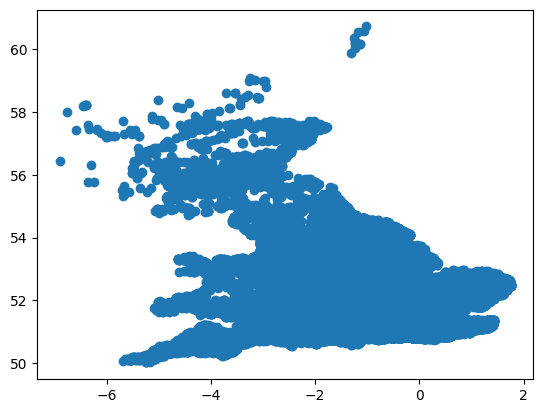

In [108]:
plt.scatter(df['Longitude'] ,df['Latitude'] )

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

i will imblemnt the PCA to redeus the data

In [118]:
Z = (relv_data_df - relv_data_df.mean())/relv_data_df.std()
Z.dropna(inplace=True)

pca= PCA(n_components=2).fit(Z)
redu_df = pca.transform(Z)
redu_df.shape

(52000, 2)

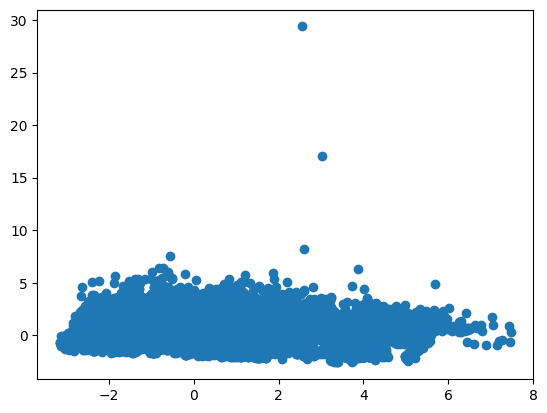

In [132]:
plt.scatter(redu_df[:, 0], redu_df[:, 1])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

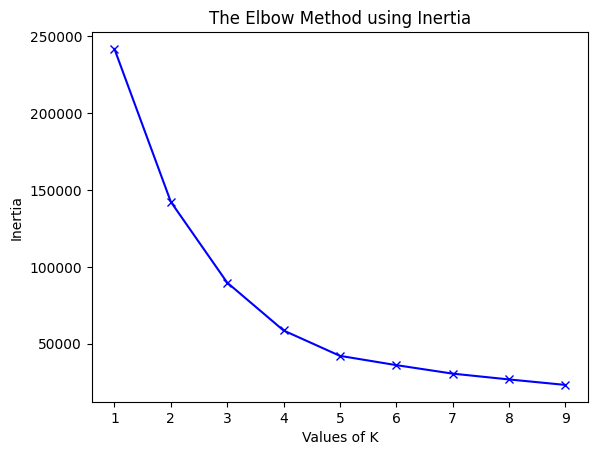

In [119]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(redu_df)
    kmeanModel.fit(redu_df)
    distortions.append(sum(np.min(cdist(redu_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / redu_df.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(redu_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / redu_df.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


the best number of clus is 5

In [120]:
KM = KMeans(n_clusters=5,init='k-means++', random_state=42)
KMeanModel = KM.fit(redu_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [156]:
db = DBSCAN(eps=0.1, min_samples=10)
DBSCANModel = db.fit(redu_df)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [137]:
KM_silhouette_score = silhouette_score(redu_df, KMeanModel.labels_)
print(f'Silhouette Coefficient : %0.2f' %KM_silhouette_score)
DBSCAN_silhouette_score = silhouette_score(redu_df, DBSCANModel.labels_)
print(f'Silhouette Coefficient : %0.2f' %DBSCAN_silhouette_score)


Silhouette Coefficient : 0.52
Silhouette Coefficient : -0.43


## Plot the data points with their predicted cluster center

Kmeans plot

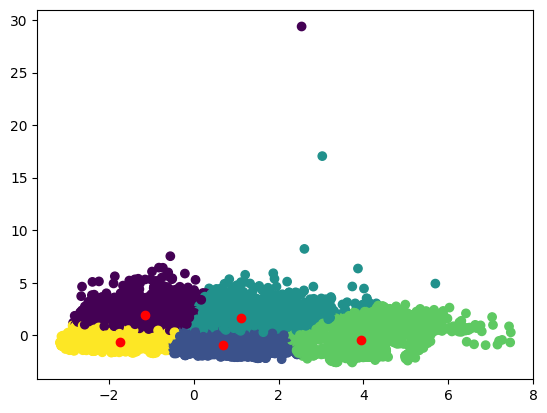

In [138]:
plt.scatter(redu_df[:, 0], redu_df[:, 1], c=KMeanModel.labels_)
plt.scatter(KMeanModel.cluster_centers_[:, 0], KMeanModel.cluster_centers_[:, 1], color='r')
plt.show()



DBSCAN plot

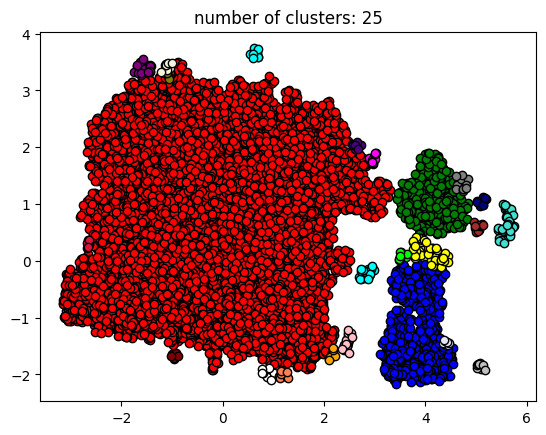

In [157]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    "Red", "Blue", "Green", "Yellow", "Purple", "Orange", "Pink", "Brown",
    "White", "Gray", "Cyan", "Lavender", "Turquoise", "Maroon", "Olive", "Coral",
    "Navy", "Beige", "Aqua", "Fuchsia", "Crimson", "Indigo", "Silver", "Lime"
]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = redu_df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = redu_df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

   -- i choes the ones that i see corrlation in them and the ones you providred with explaining but i removed the police because it was not related to any of the data

* **Number of Clusters Choices:**
   - How did you determine the optimal number?

   -- form the elbow method the point that the line start to be linear after it
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   
   -- i used both to see the diffrence and i noticed  that the K means was 5 clusters while the DBSCAN was 5 TIMES that and most of the data were in one cluster
   -- but the db removed all outlieas form the data so it is the best even though most of the data is in one cluster

* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

   -- i uesd PCA to redus the data so the model be faster and more balensd and i used 2 component for Visualization  and standerd scaling not minmax scaling because it the best fit for our data

